In [3]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('예제/part4/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df_seoul.head(8)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [7]:

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

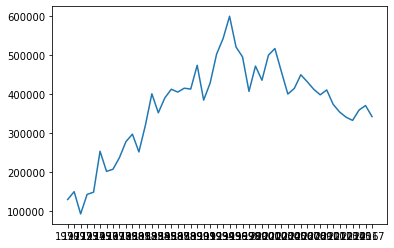

In [8]:

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)


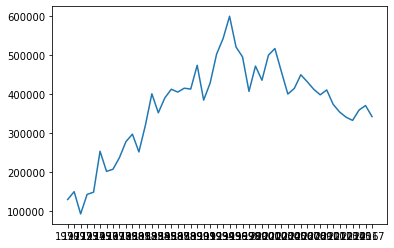

In [9]:

# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)


C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0,

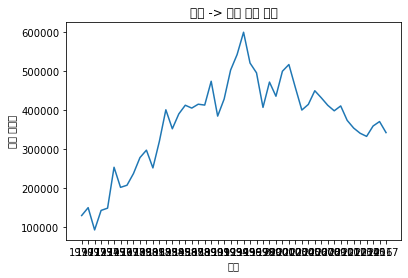

In [10]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

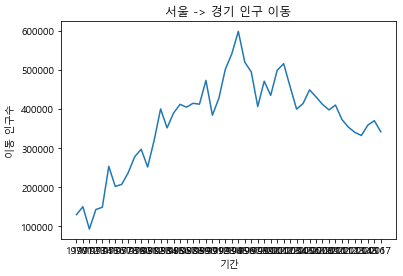

In [15]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "예제/part4/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력
plt.show()  # 변경사항 저장하고 그래프 출력

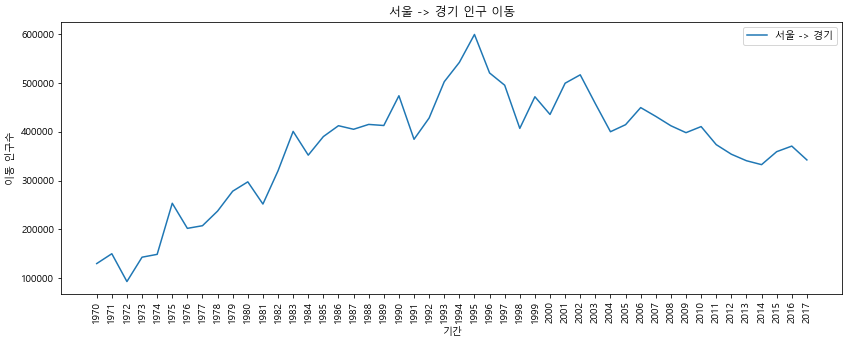

In [16]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

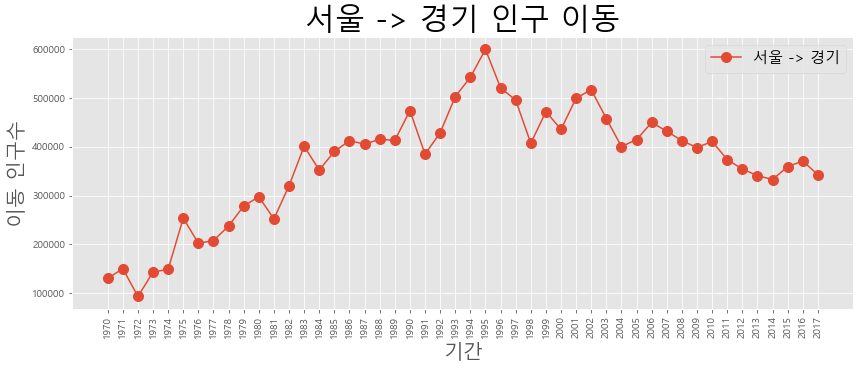

In [17]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력


In [18]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


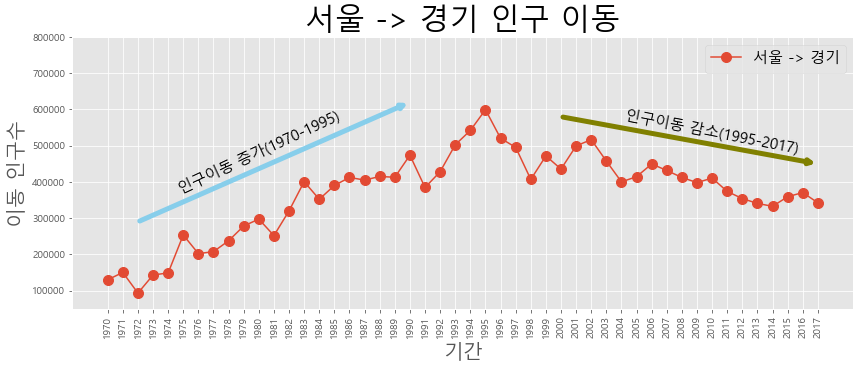

In [26]:

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

#범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 370000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 480000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력
